**SC 500M Instructions Integrated**

**352 ROB OPT MC**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
baseline_4cores_out_path = '../../prac_study/TimingOverhead/SC/OPTMC/352rob'

df = pd.DataFrame(columns=["mitigation", "workload", "WS"])
mitigation_list = ["Baseline", "PRAC_WO_Mitigation", 
                   "Baseline-ClosedCap4", "PRAC_WO_Mitigation-ClosedCap4"]
for mitigation in mitigation_list:
    result_path = baseline_4cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])
        interface = int(result_filename.split("_")[1])

        workload = "_".join(result_filename.split("_")[2:])

        ipc_0 = 0
        cycle_0 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_abo=0
        num_tREFI_period=0
        num_tREFW_period=0
        num_rd_reqs=0
        num_wr_reqs=0
        for line in result_file.readlines():
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" prac_num_recovery" in line):
                num_abo = int(line.split(" ")[-1])
            if (" num_refresh_command_0" in line):
                num_tREFI_period = int(line.split(" ")[-1])
            if (" num_refresh_window_0" in line):
                num_tREFW_period = int(line.split(" ")[-1])            
            if (" total_num_read_requests" in line):
                num_rd_reqs = int(line.split(" ")[-1])
            if (" total_num_write_requests" in line):
                num_wr_reqs = int(line.split(" ")[-1])

        if (cycle_0 == 0):
            continue
        if (cycle_0 == 0 ):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        wr_reqs_ratio = float(int(num_wr_reqs)/int(num_rd_reqs + num_wr_reqs))

        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'interface': [interface],
            'WS': [ipc_0],
            'RD_REQs': [num_rd_reqs],
            'WR_REQs': [num_wr_reqs],
            'WR_ratio': [wr_reqs_ratio]
        })
        df = pd.concat([df, new_row], ignore_index=True)

df[['workload', 'Channel', 'interface', 'mitigation', 'RD_REQs', 'WR_REQs', 'WR_ratio']].to_csv('./../stats/SC_500M_OPTMC_workload_characteristics.csv', index=False)
df_baseline = df.pivot(index=['workload', 'Channel', 'interface'], columns=['mitigation'], values='WS').reset_index()
df_baseline[['workload', 'Channel','interface', 'Baseline','Baseline-ClosedCap4']].to_csv('./../stats/SC_500M_OPTMC_Baseline.csv', index=False)

# List of PRAC_WO_Mitigation columns and their corresponding Baseline columns
prac_columns = [
    'PRAC_WO_Mitigation',
    'PRAC_WO_Mitigation-ClosedCap4'
]

baseline_columns = [
    'Baseline',
    'Baseline-ClosedCap4'
]

# Loop through each pair of PRAC and Baseline columns to create normalized columns
for prac_col, baseline_col in zip(prac_columns, baseline_columns):
    normalized_col_name = f'Normalized_{prac_col}'  # Name of the new normalized column
    df_baseline[normalized_col_name] = df_baseline[prac_col] / df_baseline[baseline_col]  # Calculate normalized values

# print(df_baseline)

# workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
#                       '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
#                       'tpcc64', 'tpch17', 'tpch2', 'tpch6',
#                       'grep_map0', 'wc_8443', 'wc_map0',
#                       'h264_encode', 'jp2_decode', 'jp2_encode',
#                       'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver',
#                       'random_10.trace', 'stream_10.trace'
#                       ]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (23)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 23
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
mitigation_list = ["Normalized_PRAC_WO_Mitigation","Normalized_PRAC_WO_Mitigation-ClosedCap1","Normalized_PRAC_WO_Mitigation-ClosedCap4"]

# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[(df['workload'].isin(workloads)) & (df['Channel'] == Channel) & (df['interface'] == interface)]
                if not suite_df.empty:
                    geomeans = {}
                    
                    # Dynamically calculate geometric means for each mitigation
                    for mitigation in mitigation_list:
                        if mitigation in suite_df.columns:  # Ensure the column exists
                            geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                    
                    # Create a new row
                    geomean_row = {'Channel': Channel, 'interface': interface, 'workload': suite_name, **geomeans}
                    geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

# Function to add combined geometric means for all workloads in each channel and interface
def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            Channel_interface_df = df[(df['Channel'] == Channel) & (df['interface'] == interface)]
            geomean_values = {}

            # Calculate geometric means for each mitigation in the list
            for mitigation in mitigation_list:
                if mitigation in Channel_interface_df.columns:  # Ensure the column exists
                    geomean_values[mitigation] = calculate_geometric_mean(Channel_interface_df[mitigation])

            # Create a new row for the combined results
            geomean_row = {'Channel': Channel, 'interface': interface, 'workload': 'All (90)', **geomean_values}
            geomean_rows.append(geomean_row)  # Append to the list
    
    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)
# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_baseline)
print(geomean_df)
# geomean_df = add_all_workloads_geomean_rows(geomean_df)
geomean_df[['workload', 'Channel', 'interface', "Normalized_PRAC_WO_Mitigation","Normalized_PRAC_WO_Mitigation-ClosedCap4"]].to_csv('./../stats/SC_500M_OPTMC_result.csv', index=False)

           workload  Channel  interface  Baseline  Baseline-ClosedCap4  \
0         401.bzip2      1.0     3200.0  3.291958             3.294998   
1         401.bzip2      1.0     4800.0  3.347153             3.349532   
2         401.bzip2      1.0     6400.0  3.381844             3.382914   
3         401.bzip2      1.0     8000.0  3.398990             3.400546   
4         401.bzip2      1.0     8800.0  3.401019             3.403233   
..              ...      ...        ...       ...                  ...   
940   SPEC2K17 (18)     16.0     8800.0       NaN                  NaN   
941         TPC (4)     16.0     8800.0       NaN                  NaN   
942      Hadoop (3)     16.0     8800.0       NaN                  NaN   
943  MediaBench (3)     16.0     8800.0       NaN                  NaN   
944        YCSB (6)     16.0     8800.0       NaN                  NaN   

     PRAC_WO_Mitigation  PRAC_WO_Mitigation-ClosedCap4  \
0              3.218930                       3.22195

**4-Core, MOP, 500M, Open Page, Varying Channel**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

multi_cores_out_path = '../../prac_study/TimingOverhead/4cores_results/OPTMC'

df = pd.DataFrame(columns=["mitigation", "workload"])
mitigation_list = ["Baseline","PRAC_WO_Mitigation"]
# mitigation_list = ["Baseline-ClosedCap1"]
for mitigation in mitigation_list:
    result_path = multi_cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])
        interface = int(result_filename.split("_")[1])
        # if interface != 8800:
        if interface != 8000:
            continue
        workload = "_".join(result_filename.split("_")[2:])

        w0=''
        w1=''
        w2=''
        w3=''
        ipc_0 = 0
        ipc_1 = 0
        ipc_2 = 0
        ipc_3 = 0
        cycle_0 = 0
        cycle_1 = 0
        cycle_2 = 0
        cycle_3 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_rd_reqs=0
        num_wr_reqs=0
        wr_reqs_ratio = 0.0
        # num_tREFI_period=0
        # num_tREFW_period=0
        for line in result_file.readlines():
            if ("name_trace_0:" in line):
                w0 = str(line.split("/")[-1]).strip()
            if ("name_trace_1:" in line):
                w1 = str(line.split("/")[-1]).strip()
            if ("name_trace_2:" in line):
                w2 = str(line.split("/")[-1]).strip()
            if ("name_trace_3:" in line):
                w3 = str(line.split("/")[-1]).strip()
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_1" in line):
                num_inst_1 = int(line.split(" ")[-1])
            if (" insts_recorded_core_2" in line):
                num_inst_2 = int(line.split(" ")[-1])
            if (" insts_recorded_core_3" in line):
                num_inst_3 = int(line.split(" ")[-1])
            if (" total_num_read_requests" in line):
                num_rd_reqs = int(line.split(" ")[-1])
            if (" total_num_write_requests" in line):
                num_wr_reqs = int(line.split(" ")[-1])
            # if (" prac_num_recovery" in line):
            #     num_abo = int(line.split(" ")[-1])
            # if (" num_refresh_command_0" in line):
            #     num_tREFI_period = int(line.split(" ")[-1])
            # if (" num_refresh_window_0" in line):
            #     num_tREFW_period = int(line.split(" ")[-1])            
                
        if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
            continue
        if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        ipc_1 = int(num_inst_1) / cycle_1
        ipc_2 = int(num_inst_2) / cycle_2
        ipc_3 = int(num_inst_3) / cycle_3
        
        wr_reqs_ratio = float(int(num_wr_reqs)/int(num_rd_reqs + num_wr_reqs))
        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'interface': [interface],
            'wl0': [w0],
            'wl1': [w1],
            'wl2': [w2],
            'wl3': [w3],
            'ipc0': [ipc_0],
            'ipc1': [ipc_1],
            'ipc2': [ipc_2],
            'ipc3': [ipc_3],
            'RD_REQs': [num_rd_reqs],
            'WR_REQs': [num_wr_reqs],
            'WR_ratio': [wr_reqs_ratio],
        })
        df = pd.concat([df, new_row], ignore_index=True)

# print(df)
df[['workload', 'interface', 'Channel', 'mitigation', 'RD_REQs', 'WR_REQs', 'WR_ratio']].to_csv('./../stats/4core_OPTMC_heterogeneous_workload_characteristics.csv', index=False)

df_sc_ipc = pd.read_csv('../stats/SC_500M_OPTMC_Baseline.csv')
# Choose only interested baseline
df_sc_ipc = df_sc_ipc[['workload', 'Channel', 'interface', 'Baseline']]
# df_sc_ipc = df_sc_ipc[(df_sc_ipc['interface'] == 8800)]
df_sc_ipc = df_sc_ipc[(df_sc_ipc['interface'] == 8000)]
# df_sc_ipc = df_sc_ipc.drop(columns=['interface'])
df_sc_ipc = df_sc_ipc.rename(columns={'workload': 'workload_sc'})
# print(df_sc_ipc)

# # First, merge df with df_sc_ipc for each workload (wl0, wl1, wl2, wl3)
# df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline']], left_on=['Channel', 'wl0'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl0'})
# if 'workload_sc' in df.columns:
#     df = df.drop(columns=['workload_sc'])  # Drop 'workload' if it exists

# df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline']], left_on=['Channel', 'wl1'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl1'})
# if 'workload_sc' in df.columns:
#     df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

# df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline']], left_on=['Channel', 'wl2'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl2'})
# if 'workload_sc' in df.columns:
#     df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

# df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline']], left_on=['Channel', 'wl3'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl3'})
# if 'workload_sc' in df.columns:
#     df = df.drop(columns=['workload_sc'])  # Final cleanup

# First, merge df with df_sc_ipc for each workload (wl0, wl1, wl2, wl3)
df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl0'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl1'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl2'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl3'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Final cleanup

df['normalzied_ipc0'] = df['ipc0'] / df['ipc_wl0']
df['normalzied_ipc1'] = df['ipc1'] / df['ipc_wl1']
df['normalzied_ipc2'] = df['ipc2'] / df['ipc_wl2']
df['normalzied_ipc3'] = df['ipc3'] / df['ipc_wl3']

df['WS'] = df[['normalzied_ipc0', 'normalzied_ipc1', 'normalzied_ipc2', 'normalzied_ipc3']].sum(axis=1)

df_closed_cap1_ws = df[['mitigation', 'workload', 'Channel', 'WS']]

df_closed_cap1_ws_pivot = df_closed_cap1_ws.pivot(index=['workload', 'Channel'], columns=['mitigation'], values='WS').reset_index()
for mitigation in set(mitigation_list) - set(['Baseline']):
     df_closed_cap1_ws_pivot[mitigation] = df_closed_cap1_ws_pivot[mitigation] / df_closed_cap1_ws_pivot['Baseline']
df_closed_cap1_ws_pivot.drop(columns=['Baseline'], inplace=True)
##### Calculate the Geomean for each workload type
# Define benchmark suites and their corresponding workloads ranges
benchmark_types = {
    'HHHH (15)': list(range(0, 15)),   # From Mix0-Mix14
    'MMMM (15)': list(range(15, 30)),  # From Mix15-Mix29
    'LLLL (15)': list(range(30, 45)),  # From Mix30-Mix44
    'HHMM (15)': list(range(45, 60)),  # From Mix45-Mix59
    'HHLL (15)': list(range(60, 75)),  # From Mix60-Mix74
    'MMLL (15)': list(range(75, 90)),  # From Mix75-Mix89
}

# DataFrame Example (you already have your df)
# Assuming your column of interest is 'PRAC_WO_Mitigation-ClosedCap1'

# Add a new column to assign each Mix to the appropriate suite
def assign_benchmark_types(mix_index):
    for suite, mix_range in benchmark_types.items():
        if mix_index in mix_range:
            return suite
    return None

# Assuming 'workload' has values like 'MIX0', 'MIX1', etc., you can extract the index
df_closed_cap1_ws_pivot['Mix_index'] = df_closed_cap1_ws_pivot['workload'].str.extract(r'(\d+)').astype(int)  # Extract Mix number
df_closed_cap1_ws_pivot['Benchmark_Types'] = df_closed_cap1_ws_pivot['Mix_index'].apply(assign_benchmark_types)  # Assign benchmark suite

# Function to calculate the geometric mean
def geom_mean(series):
    return np.exp(np.log(series).mean())

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for suite_name, mix_indices in benchmark_types.items():
            # Create a list of corresponding workload names (e.g., MIX0, MIX1)
            workloads = [f'MIX{i}' for i in mix_indices]
            suite_df = df[df['workload'].isin(workloads) & (df['Channel'] == Channel)]
            if not suite_df.empty:
                geomeans = {}
                
                # Dynamically calculate geometric means for each mitigation
                for mitigation in mitigation_list:
                    geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                
                # Create a new row
                geomean_row = {'Channel': Channel, 'workload': suite_name, **geomeans}
                geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        Channel_df = df[df['Channel'] == Channel]
        geomean_values = {}
        
        # Calculate geometric means for each mitigation in the list
        for mitigation in mitigation_list:
            if mitigation in Channel_df.columns:  # Ensure the column exists
                geomean_values[mitigation] = calculate_geometric_mean(Channel_df[mitigation])

        # Create a new row for the combined results
        geomean_row = {'Channel': Channel, 'workload': 'All (90)', **geomean_values}
        geomean_rows.append(geomean_row)  # Append to the list
    
    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

mitigation_list = ["PRAC_WO_Mitigation"]

geomean_df = add_geomean_rows(df_closed_cap1_ws_pivot)
geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
geomean_df[['workload', 'Channel', 'PRAC_WO_Mitigation', "Benchmark_Types"]].to_csv('../stats/4cores_OPTMC_DDR58000_500M_Heterogeneous_OpenPage_varying_channels.csv', index=False)


     workload  Channel  PRAC_WO_Mitigation  Mix_index Benchmark_Types
0        MIX0      1.0            0.865557        0.0       HHHH (15)
1        MIX0      2.0            0.846191        0.0       HHHH (15)
2        MIX0      4.0            0.847842        0.0       HHHH (15)
3        MIX0      8.0            0.868932        0.0       HHHH (15)
4        MIX0     16.0            0.875056        0.0       HHHH (15)
..        ...      ...                 ...        ...             ...
480  All (90)      1.0            0.912212        NaN             NaN
481  All (90)      2.0            0.913867        NaN             NaN
482  All (90)      4.0            0.926189        NaN             NaN
483  All (90)      8.0            0.937950        NaN             NaN
484  All (90)     16.0            0.945861        NaN             NaN

[485 rows x 5 columns]


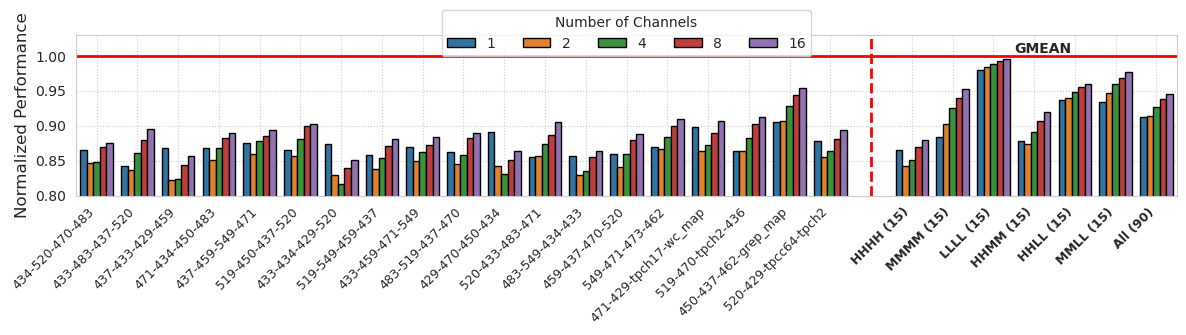

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import matplotlib.font_manager as fm

# List all available font names
# available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
# print(available_fonts)

df_ws = pd.read_csv('../stats/4cores_OPTMC_DDR58000_500M_Heterogeneous_OpenPage_varying_channels.csv')

# Define the list of workloads you want to add
geomean_workloads = [
    'HHHH (15)', 'MMMM (15)', 'LLLL (15)', 
    'HHMM (15)', 'HHLL (15)', 'MMLL (15)', 'All (90)'
]

# Filter the rows in df_melted that match the specified workloads
df_workloads = df_ws[df_ws['workload'].isin(geomean_workloads)]

## Preprocessing df_filtered
# Filter the data to show the results only for Med and High MPKI
xticks_order =  ['MIX0', 'MIX2', 'MIX3', 'MIX4', 'MIX5', 'MIX6', 'MIX7', 'MIX8', 'MIX9', 'MIX10', 
                 'MIX11', 'MIX12', 'MIX13', 'MIX14', 'MIX46', 'MIX48', 'MIX49', 'MIX50', 'MIX52',
                 ' ',
                 'HHHH (15)', 'MMMM (15)', 'LLLL (15)', 
                 'HHMM (15)', 'HHLL (15)', 'MMLL (15)', 'All (90)' 
                 ]

df_ordered = df_ws[df_ws['workload'].isin(xticks_order)]


# Dictionary mapping MIX labels to workload combinations
mix_workloads = {
    'MIX0': '434-520-470-483',
    'MIX2': '433-483-437-520',
    'MIX3': '437-433-429-459',
    'MIX4': '471-434-450-483',
    'MIX5': '437-459-549-471',
    'MIX6': '519-450-437-520',
    'MIX7': '433-434-429-520',
    'MIX8': '519-549-459-437',
    'MIX9': '433-459-471-549',
    'MIX10': '483-519-437-470',
    'MIX11': '429-470-450-434',
    'MIX12': '520-433-483-471',
    'MIX13': '483-549-434-433',
    'MIX14': '459-437-470-520',
    'MIX46': '549-471-473-462',
    'MIX48': '471-429-tpch17-wc_map',
    'MIX49': '519-470-tpch2-436',
    'MIX50': '450-437-462-grep_map',
    'MIX52': '520-429-tpcc64-tpch2',
}

# Update the xticks_order list
xticks_order_updated = [
    mix_workloads.get(tick, tick) for tick in xticks_order
]

fig, ax = plt.subplots(figsize=(12,3.7))
plt.rc('font', size=10)

sns.set_palette('tab10')
sns.set_style("whitegrid")


# Count unique hue values
unique_channels = df_ws['Channel'].nunique()

# Set the palette explicitly for better control
palette = sns.color_palette("tab10", unique_channels)

sns.barplot(x='workload', y='PRAC_WO_Mitigation', hue='Channel', order=xticks_order, data=df_ws, palette=palette, edgecolor='black')

ax.set_xticks(np.arange(len(xticks_order)))
ax.set_xticklabels(xticks_order_updated, ha='right', rotation=45, fontsize = 11)

# Get the positions of the x-ticks
tick_labels = ax.get_xticklabels()

# Find the positions of geomean labels
geomean_labels = ['HHHH (15)', 'MMMM (15)', 'LLLL (15)', 'HHMM (15)', 'HHLL (15)', 'MMLL (15)',  'All (90)']
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(19, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(22.5, 1.005, 'GMEAN', fontweight='bold')
# ax.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
ax.set_xlabel('')
ax.set_ylabel('Normalized Performance', fontsize=12)
# Customize legend
handles, labels = ax.get_legend_handles_labels()  # Get current legend info
integer_labels = [str(int(float(label))) for label in labels]  # Convert to integers
ax.legend(
    handles, 
    integer_labels, 
    title="Number of Channels",  # Add title
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.2), 
    ncol=5, 
    fancybox=True, 
    shadow=False, 
    fontsize=10
)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.tick_params(axis='y', which='major', labelsize=10)

ax.set_ylim(0.8,1.03)
plt.grid(True, linestyle=':')

plt.tight_layout()

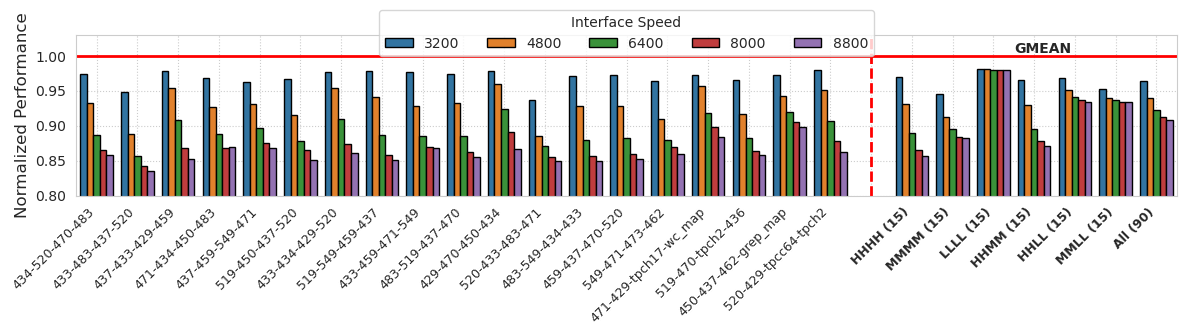

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import matplotlib.font_manager as fm

# List all available font names
# available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
# print(available_fonts)

df_ws = pd.read_csv('../stats/4cores_OPTMC_OpenPage_500M_Heterogeneous_varying_interface.csv')

df_ws = df_ws[df_ws['interface'].isin([3200,4800,6400,8000,8800])]

# Define the list of workloads you want to add
geomean_workloads = [
    'HHHH (15)', 'MMMM (15)', 'LLLL (15)', 
    'HHMM (15)', 'HHLL (15)', 'MMLL (15)', 'All (90)'
]

# Filter the rows in df_melted that match the specified workloads
df_workloads = df_ws[df_ws['workload'].isin(geomean_workloads)]

## Preprocessing df_filtered
# Filter the data to show the results only for Med and High MPKI
xticks_order =  ['MIX0', 'MIX2', 'MIX3', 'MIX4', 'MIX5', 'MIX6', 'MIX7', 'MIX8', 'MIX9', 'MIX10', 
                 'MIX11', 'MIX12', 'MIX13', 'MIX14', 'MIX46', 'MIX48', 'MIX49', 'MIX50', 'MIX52',
                 ' ',
                 'HHHH (15)', 'MMMM (15)', 'LLLL (15)', 
                 'HHMM (15)', 'HHLL (15)', 'MMLL (15)', 'All (90)' 
                 ]

df_ordered = df_ws[df_ws['workload'].isin(xticks_order)]


# Dictionary mapping MIX labels to workload combinations
mix_workloads = {
    'MIX0': '434-520-470-483',
    'MIX2': '433-483-437-520',
    'MIX3': '437-433-429-459',
    'MIX4': '471-434-450-483',
    'MIX5': '437-459-549-471',
    'MIX6': '519-450-437-520',
    'MIX7': '433-434-429-520',
    'MIX8': '519-549-459-437',
    'MIX9': '433-459-471-549',
    'MIX10': '483-519-437-470',
    'MIX11': '429-470-450-434',
    'MIX12': '520-433-483-471',
    'MIX13': '483-549-434-433',
    'MIX14': '459-437-470-520',
    'MIX46': '549-471-473-462',
    'MIX48': '471-429-tpch17-wc_map',
    'MIX49': '519-470-tpch2-436',
    'MIX50': '450-437-462-grep_map',
    'MIX52': '520-429-tpcc64-tpch2',
}

# Update the xticks_order list
xticks_order_updated = [
    mix_workloads.get(tick, tick) for tick in xticks_order
]

fig, ax = plt.subplots(figsize=(12,3.7))
plt.rc('font', size=10)

sns.set_palette('tab10')
sns.set_style("whitegrid")


# Count unique hue values
unique_channels = df_ws['interface'].nunique()

# Set the palette explicitly for better control
palette = sns.color_palette("tab10", unique_channels)

sns.barplot(x='workload', y='PRAC_WO_Mitigation', hue='interface', order=xticks_order, data=df_ws, palette=palette, edgecolor='black')

ax.set_xticks(np.arange(len(xticks_order)))
ax.set_xticklabels(xticks_order_updated, ha='right', rotation=45, fontsize = 11)

# Get the positions of the x-ticks
tick_labels = ax.get_xticklabels()

# Find the positions of geomean labels
geomean_labels = ['HHHH (15)', 'MMMM (15)', 'LLLL (15)', 'HHMM (15)', 'HHLL (15)', 'MMLL (15)',  'All (90)']
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(19, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(22.5, 1.005, 'GMEAN', fontweight='bold')
# ax.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
ax.set_xlabel('')
ax.set_ylabel('Normalized Performance', fontsize=12)
# Customize legend
handles, labels = ax.get_legend_handles_labels()  # Get current legend info
integer_labels = [str(int(float(label))) for label in labels]  # Convert to integers
ax.legend(
    handles, 
    integer_labels, 
    title="Interface Speed",  # Add title
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.2), 
    ncol=7, 
    fancybox=True, 
    shadow=False, 
    fontsize=10
)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.tick_params(axis='y', which='major', labelsize=10)

ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')
plt.tight_layout()

**4-Core, MOP, 500M, Open Page, Varying Interface**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

multi_cores_out_path = '../../prac_study/TimingOverhead/4cores_results/OPTMC'

df = pd.DataFrame(columns=["mitigation", "workload"])
mitigation_list = ["Baseline", "PRAC_WO_Mitigation"]
for mitigation in mitigation_list:
    result_path = multi_cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])
        interface = int(result_filename.split("_")[1])
        if Channel != 1:
            continue
        workload = "_".join(result_filename.split("_")[2:])

        w0=''
        w1=''
        w2=''
        w3=''
        ipc_0 = 0
        ipc_1 = 0
        ipc_2 = 0
        ipc_3 = 0
        cycle_0 = 0
        cycle_1 = 0
        cycle_2 = 0
        cycle_3 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_rd_reqs=0
        num_wr_reqs=0
        wr_reqs_ratio = 0.0
        # num_tREFI_period=0
        # num_tREFW_period=0
        for line in result_file.readlines():
            if ("name_trace_0:" in line):
                w0 = str(line.split("/")[-1]).strip()
            if ("name_trace_1:" in line):
                w1 = str(line.split("/")[-1]).strip()
            if ("name_trace_2:" in line):
                w2 = str(line.split("/")[-1]).strip()
            if ("name_trace_3:" in line):
                w3 = str(line.split("/")[-1]).strip()
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_1" in line):
                num_inst_1 = int(line.split(" ")[-1])
            if (" insts_recorded_core_2" in line):
                num_inst_2 = int(line.split(" ")[-1])
            if (" insts_recorded_core_3" in line):
                num_inst_3 = int(line.split(" ")[-1])
            if (" total_num_read_requests" in line):
                num_rd_reqs = int(line.split(" ")[-1])
            if (" total_num_write_requests" in line):
                num_wr_reqs = int(line.split(" ")[-1])
            # if (" prac_num_recovery" in line):
            #     num_abo = int(line.split(" ")[-1])
            # if (" num_refresh_command_0" in line):
            #     num_tREFI_period = int(line.split(" ")[-1])
            # if (" num_refresh_window_0" in line):
            #     num_tREFW_period = int(line.split(" ")[-1])            
                
        if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
            continue
        if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        ipc_1 = int(num_inst_1) / cycle_1
        ipc_2 = int(num_inst_2) / cycle_2
        ipc_3 = int(num_inst_3) / cycle_3
        
        wr_reqs_ratio = float(int(num_wr_reqs)/int(num_rd_reqs + num_wr_reqs))
        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'interface': [interface],
            'wl0': [w0],
            'wl1': [w1],
            'wl2': [w2],
            'wl3': [w3],
            'ipc0': [ipc_0],
            'ipc1': [ipc_1],
            'ipc2': [ipc_2],
            'ipc3': [ipc_3],
            'RD_REQs': [num_rd_reqs],
            'WR_REQs': [num_wr_reqs],
            'WR_ratio': [wr_reqs_ratio],
        })
        df = pd.concat([df, new_row], ignore_index=True)

# print(df)
df[['workload', 'interface', 'Channel', 'mitigation', 'RD_REQs', 'WR_REQs', 'WR_ratio']].to_csv('./../stats/4core_OPTMC_heterogeneous_workload_characteristics.csv', index=False)

df_sc_ipc = pd.read_csv('../stats/SC_500M_OPTMC_Baseline.csv')
# Choose only interested baseline
df_sc_ipc = df_sc_ipc[['workload', 'Channel', 'interface', 'Baseline']]
df_sc_ipc = df_sc_ipc[(df_sc_ipc['Channel'] == 1)]
# df_sc_ipc = df_sc_ipc.drop(columns=['interface'])
df_sc_ipc = df_sc_ipc.rename(columns={'workload': 'workload_sc'})
# print(df_sc_ipc)

# First, merge df with df_sc_ipc for each workload (wl0, wl1, wl2, wl3)
df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl0'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl1'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl2'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline': 'ipc_wl3'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Final cleanup

# Calculate normalized IPC for 'Baseline' and 'PRAC_WO_Mitigation' using ipc_wl
df['normalized_ipc0'] = df['ipc0'] / df['ipc_wl0']
df['normalized_ipc1'] = df['ipc1'] / df['ipc_wl1']
df['normalized_ipc2'] = df['ipc2'] / df['ipc_wl2']
df['normalized_ipc3'] = df['ipc3'] / df['ipc_wl3']

# Calculate WS for each set
df['WS'] = df[['normalized_ipc0', 'normalized_ipc1', 'normalized_ipc2', 'normalized_ipc3']].sum(axis=1)


df_open_varying_interface_ws = df[['mitigation', 'workload', 'Channel', 'interface', 'WS']]

# Pivot WS columns
df_open_varying_interface_ws_pivot = df_open_varying_interface_ws.pivot(index=['workload', 'Channel', 'interface'], columns='mitigation', values='WS').reset_index()

# Normalize WS by 'Baseline'
for mitigation in set(mitigation_list) - set(['Baseline']):
    df_open_varying_interface_ws_pivot[mitigation] = df_open_varying_interface_ws_pivot[mitigation] / df_open_varying_interface_ws_pivot['Baseline']

# Drop Baseline columns
df_open_varying_interface_ws_pivot.drop(columns=['Baseline'], inplace=True)

# Merge results back if needed
##### Calculate the Geomean for each workload type
# Define benchmark suites and their corresponding workloads ranges
benchmark_types = {
    'HHHH (15)': list(range(0, 15)),   # From Mix0-Mix14
    'MMMM (15)': list(range(15, 30)),  # From Mix15-Mix29
    'LLLL (15)': list(range(30, 45)),  # From Mix30-Mix44
    'HHMM (15)': list(range(45, 60)),  # From Mix45-Mix59
    'HHLL (15)': list(range(60, 75)),  # From Mix60-Mix74
    'MMLL (15)': list(range(75, 90)),  # From Mix75-Mix89
}

# DataFrame Example (you already have your df)
# Assuming your column of interest is 'PRAC_WO_Mitigation-ClosedCap1'

# Add a new column to assign each Mix to the appropriate suite
def assign_benchmark_types(mix_index):
    for suite, mix_range in benchmark_types.items():
        if mix_index in mix_range:
            return suite
    return None

# Assuming 'workload' has values like 'MIX0', 'MIX1', etc., you can extract the index
df_open_varying_interface_ws_pivot['Mix_index'] = df_open_varying_interface_ws_pivot['workload'].str.extract(r'(\d+)').astype(int)  # Extract Mix number
df_open_varying_interface_ws_pivot['Benchmark_Types'] = df_open_varying_interface_ws_pivot['Mix_index'].apply(assign_benchmark_types)  # Assign benchmark suite

# Function to calculate the geometric mean
def calculate_geometric_mean(series):
    return np.exp(np.log(series).mean())

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            for suite_name, mix_indices in benchmark_types.items():
                # Create a list of corresponding workload names (e.g., MIX0, MIX1)
                workloads = [f'MIX{i}' for i in mix_indices]
                suite_df = df[df['workload'].isin(workloads) & (df['Channel'] == Channel) & (df['interface'] == interface)]
                if not suite_df.empty:
                    geomeans = {}
                    
                    # Dynamically calculate geometric means for each mitigation
                    for mitigation in mitigation_list:
                        if mitigation in suite_df.columns:  # Ensure the column exists
                            geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                    
                    # Create a new row
                    geomean_row = {'Channel': Channel, 'interface': interface, 'workload': suite_name, **geomeans}
                    geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            Channel_interface_df = df[(df['Channel'] == Channel) & (df['interface'] == interface)]
            geomean_values = {}
            
            # Calculate geometric means for each mitigation in the list
            for mitigation in mitigation_list:
                if mitigation in Channel_interface_df.columns:  # Ensure the column exists
                    geomean_values[mitigation] = calculate_geometric_mean(Channel_interface_df[mitigation])

            # Create a new row for the combined results
            geomean_row = {'Channel': Channel, 'interface': interface, 'workload': 'All (90)', **geomean_values}
            geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

mitigation_list = ["PRAC_WO_Mitigation"]

geomean_df = add_geomean_rows(df_open_varying_interface_ws_pivot)
geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
geomean_df[['workload', 'Channel', 'interface', 'PRAC_WO_Mitigation', "Benchmark_Types"]].to_csv('../stats/4cores_OPTMC_OpenPage_500M_Heterogeneous_varying_interface.csv', index=False)


     workload  Channel  interface  PRAC_WO_Mitigation  Mix_index  \
0        MIX0      1.0     3200.0            0.973599        0.0   
1        MIX0      1.0     4800.0            0.932350        0.0   
2        MIX0      1.0     6400.0            0.886445        0.0   
3        MIX0      1.0     8000.0            0.865557        0.0   
4        MIX0      1.0     8800.0            0.858497        0.0   
..        ...      ...        ...                 ...        ...   
669  All (90)      1.0     6400.0            0.922787        NaN   
670  All (90)      1.0     8000.0            0.912212        NaN   
671  All (90)      1.0     8800.0            0.908726        NaN   
672  All (90)      1.0    12800.0            0.902723        NaN   
673  All (90)      1.0    17600.0            0.901645        NaN   

    Benchmark_Types  
0         HHHH (15)  
1         HHHH (15)  
2         HHHH (15)  
3         HHHH (15)  
4         HHHH (15)  
..              ...  
669             NaN  
670    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

multi_cores_out_path = '../../prac_study/TimingOverhead/4cores_results/OPTMC'

df = pd.DataFrame(columns=["mitigation", "workload"])
mitigation_list = ["Baseline-ClosedCap4", "PRAC_WO_Mitigation-ClosedCap4"]
for mitigation in mitigation_list:
    result_path = multi_cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])
        interface = int(result_filename.split("_")[1])
        if Channel != 1:
            continue
        workload = "_".join(result_filename.split("_")[2:])

        w0=''
        w1=''
        w2=''
        w3=''
        ipc_0 = 0
        ipc_1 = 0
        ipc_2 = 0
        ipc_3 = 0
        cycle_0 = 0
        cycle_1 = 0
        cycle_2 = 0
        cycle_3 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_rd_reqs=0
        num_wr_reqs=0
        wr_reqs_ratio = 0.0
        # num_tREFI_period=0
        # num_tREFW_period=0
        for line in result_file.readlines():
            if ("name_trace_0:" in line):
                w0 = str(line.split("/")[-1]).strip()
            if ("name_trace_1:" in line):
                w1 = str(line.split("/")[-1]).strip()
            if ("name_trace_2:" in line):
                w2 = str(line.split("/")[-1]).strip()
            if ("name_trace_3:" in line):
                w3 = str(line.split("/")[-1]).strip()
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_1" in line):
                num_inst_1 = int(line.split(" ")[-1])
            if (" insts_recorded_core_2" in line):
                num_inst_2 = int(line.split(" ")[-1])
            if (" insts_recorded_core_3" in line):
                num_inst_3 = int(line.split(" ")[-1])
            if (" total_num_read_requests" in line):
                num_rd_reqs = int(line.split(" ")[-1])
            if (" total_num_write_requests" in line):
                num_wr_reqs = int(line.split(" ")[-1])
            # if (" prac_num_recovery" in line):
            #     num_abo = int(line.split(" ")[-1])
            # if (" num_refresh_command_0" in line):
            #     num_tREFI_period = int(line.split(" ")[-1])
            # if (" num_refresh_window_0" in line):
            #     num_tREFW_period = int(line.split(" ")[-1])            
                
        if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
            continue
        if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        ipc_1 = int(num_inst_1) / cycle_1
        ipc_2 = int(num_inst_2) / cycle_2
        ipc_3 = int(num_inst_3) / cycle_3
        
        wr_reqs_ratio = float(int(num_wr_reqs)/int(num_rd_reqs + num_wr_reqs))
        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'interface': [interface],
            'wl0': [w0],
            'wl1': [w1],
            'wl2': [w2],
            'wl3': [w3],
            'ipc0': [ipc_0],
            'ipc1': [ipc_1],
            'ipc2': [ipc_2],
            'ipc3': [ipc_3],
            'RD_REQs': [num_rd_reqs],
            'WR_REQs': [num_wr_reqs],
            'WR_ratio': [wr_reqs_ratio],
        })
        df = pd.concat([df, new_row], ignore_index=True)

# print(df)
df[['workload', 'interface', 'Channel', 'mitigation', 'RD_REQs', 'WR_REQs', 'WR_ratio']].to_csv('./../stats/4core_OPTMC_heterogeneous_workload_characteristics.csv', index=False)

df_sc_ipc = pd.read_csv('../stats/SC_500M_OPTMC_Baseline.csv')
# Choose only interested baseline
df_sc_ipc = df_sc_ipc[['workload', 'Channel', 'interface', 'Baseline-ClosedCap4']]
df_sc_ipc = df_sc_ipc[(df_sc_ipc['Channel'] == 1)]
# df_sc_ipc = df_sc_ipc.drop(columns=['interface'])
df_sc_ipc = df_sc_ipc.rename(columns={'workload': 'workload_sc'})
# print(df_sc_ipc)

# First, merge df with df_sc_ipc for each workload (wl0, wl1, wl2, wl3)
df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline-ClosedCap4']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap4': 'ipc_wl0'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline-ClosedCap4']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap4': 'ipc_wl1'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline-ClosedCap4']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap4': 'ipc_wl2'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'interface', 'workload_sc', 'Baseline-ClosedCap4']], left_on=['Channel', 'interface', 'wl0'], right_on=['Channel', 'interface', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap4': 'ipc_wl3'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Final cleanup

# Calculate normalized IPC for 'Baseline' and 'PRAC_WO_Mitigation' using ipc_wl
df['normalized_ipc0'] = df['ipc0'] / df['ipc_wl0']
df['normalized_ipc1'] = df['ipc1'] / df['ipc_wl1']
df['normalized_ipc2'] = df['ipc2'] / df['ipc_wl2']
df['normalized_ipc3'] = df['ipc3'] / df['ipc_wl3']

# Calculate WS for each set
df['WS'] = df[['normalized_ipc0', 'normalized_ipc1', 'normalized_ipc2', 'normalized_ipc3']].sum(axis=1)


df_open_varying_interface_ws = df[['mitigation', 'workload', 'Channel', 'interface', 'WS']]

# Pivot WS columns
df_open_varying_interface_ws_pivot = df_open_varying_interface_ws.pivot(index=['workload', 'Channel', 'interface'], columns='mitigation', values='WS').reset_index()

# Normalize WS by 'Baseline'
for mitigation in set(mitigation_list) - set(['Baseline-ClosedCap4']):
    df_open_varying_interface_ws_pivot[mitigation] = df_open_varying_interface_ws_pivot[mitigation] / df_open_varying_interface_ws_pivot['Baseline-ClosedCap4']

# Drop Baseline columns
df_open_varying_interface_ws_pivot.drop(columns=['Baseline-ClosedCap4'], inplace=True)

# Merge results back if needed
##### Calculate the Geomean for each workload type
# Define benchmark suites and their corresponding workloads ranges
benchmark_types = {
    'HHHH (15)': list(range(0, 15)),   # From Mix0-Mix14
    'MMMM (15)': list(range(15, 30)),  # From Mix15-Mix29
    'LLLL (15)': list(range(30, 45)),  # From Mix30-Mix44
    'HHMM (15)': list(range(45, 60)),  # From Mix45-Mix59
    'HHLL (15)': list(range(60, 75)),  # From Mix60-Mix74
    'MMLL (15)': list(range(75, 90)),  # From Mix75-Mix89
}

# DataFrame Example (you already have your df)
# Assuming your column of interest is 'PRAC_WO_Mitigation-ClosedCap1'

# Add a new column to assign each Mix to the appropriate suite
def assign_benchmark_types(mix_index):
    for suite, mix_range in benchmark_types.items():
        if mix_index in mix_range:
            return suite
    return None

# Assuming 'workload' has values like 'MIX0', 'MIX1', etc., you can extract the index
df_open_varying_interface_ws_pivot['Mix_index'] = df_open_varying_interface_ws_pivot['workload'].str.extract(r'(\d+)').astype(int)  # Extract Mix number
df_open_varying_interface_ws_pivot['Benchmark_Types'] = df_open_varying_interface_ws_pivot['Mix_index'].apply(assign_benchmark_types)  # Assign benchmark suite

# Function to calculate the geometric mean
def calculate_geometric_mean(series):
    return np.exp(np.log(series).mean())

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            for suite_name, mix_indices in benchmark_types.items():
                # Create a list of corresponding workload names (e.g., MIX0, MIX1)
                workloads = [f'MIX{i}' for i in mix_indices]
                suite_df = df[df['workload'].isin(workloads) & (df['Channel'] == Channel) & (df['interface'] == interface)]
                if not suite_df.empty:
                    geomeans = {}
                    
                    # Dynamically calculate geometric means for each mitigation
                    for mitigation in mitigation_list:
                        if mitigation in suite_df.columns:  # Ensure the column exists
                            geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                    
                    # Create a new row
                    geomean_row = {'Channel': Channel, 'interface': interface, 'workload': suite_name, **geomeans}
                    geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            Channel_interface_df = df[(df['Channel'] == Channel) & (df['interface'] == interface)]
            geomean_values = {}
            
            # Calculate geometric means for each mitigation in the list
            for mitigation in mitigation_list:
                if mitigation in Channel_interface_df.columns:  # Ensure the column exists
                    geomean_values[mitigation] = calculate_geometric_mean(Channel_interface_df[mitigation])

            # Create a new row for the combined results
            geomean_row = {'Channel': Channel, 'interface': interface, 'workload': 'All (57)', **geomean_values}
            geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

mitigation_list = ["PRAC_WO_Mitigation-ClosedCap4"]

geomean_df = add_geomean_rows(df_open_varying_interface_ws_pivot)
geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
geomean_df[['workload', 'Channel', 'interface', 'PRAC_WO_Mitigation-ClosedCap4', "Benchmark_Types"]].to_csv('../stats/4cores_OPTMC_ClosedCap4_500M_Heterogeneous_varying_interface.csv', index=False)


**128 ROB NonOPT MC**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
baseline_4cores_out_path = '../TimingOverhead/SC'

df = pd.DataFrame(columns=["mitigation", "workload", "WS"])
mitigation_list = ["Baseline", "PRAC_WO_Mitigation", 
                   "Baseline-ClosedCap4", "PRAC_WO_Mitigation-ClosedCap4",
                   "Baseline-ClosedCap1", "PRAC_WO_Mitigation-ClosedCap1"]
for mitigation in mitigation_list:
    result_path = baseline_4cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])
        interface = int(result_filename.split("_")[1])

        workload = "_".join(result_filename.split("_")[2:])

        ipc_0 = 0
        cycle_0 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_abo=0
        num_tREFI_period=0
        num_tREFW_period=0
        for line in result_file.readlines():
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" prac_num_recovery" in line):
                num_abo = int(line.split(" ")[-1])
            if (" num_refresh_command_0" in line):
                num_tREFI_period = int(line.split(" ")[-1])
            if (" num_refresh_window_0" in line):
                num_tREFW_period = int(line.split(" ")[-1])            
                
        if (cycle_0 == 0):
            continue
        if (cycle_0 == 0 ):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0

        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'interface': [interface],
            'WS': [ipc_0]
        })
        df = pd.concat([df, new_row], ignore_index=True)

df_baseline = df.pivot(index=['workload', 'Channel', 'interface'], columns=['mitigation'], values='WS').reset_index()

# List of PRAC_WO_Mitigation columns and their corresponding Baseline columns
prac_columns = [
    'PRAC_WO_Mitigation',
    'PRAC_WO_Mitigation-ClosedCap1',
    'PRAC_WO_Mitigation-ClosedCap4'
]

baseline_columns = [
    'Baseline',
    'Baseline-ClosedCap1',
    'Baseline-ClosedCap4'
]

# Loop through each pair of PRAC and Baseline columns to create normalized columns
for prac_col, baseline_col in zip(prac_columns, baseline_columns):
    normalized_col_name = f'Normalized_{prac_col}'  # Name of the new normalized column
    df_baseline[normalized_col_name] = df_baseline[prac_col] / df_baseline[baseline_col]  # Calculate normalized values

# print(df_baseline)

# workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
#                       '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
#                       'tpcc64', 'tpch17', 'tpch2', 'tpch6',
#                       'grep_map0', 'wc_8443', 'wc_map0',
#                       'h264_encode', 'jp2_decode', 'jp2_encode',
#                       'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver',
#                       'random_10.trace', 'stream_10.trace'
#                       ]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
mitigation_list = ["Normalized_PRAC_WO_Mitigation","Normalized_PRAC_WO_Mitigation-ClosedCap1","Normalized_PRAC_WO_Mitigation-ClosedCap4"]

# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[(df['workload'].isin(workloads)) & (df['Channel'] == Channel) & (df['interface'] == interface)]
                if not suite_df.empty:
                    geomeans = {}
                    
                    # Dynamically calculate geometric means for each mitigation
                    for mitigation in mitigation_list:
                        if mitigation in suite_df.columns:  # Ensure the column exists
                            geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                    
                    # Create a new row
                    geomean_row = {'Channel': Channel, 'interface': interface, 'workload': suite_name, **geomeans}
                    geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

# Function to add combined geometric means for all workloads in each channel and interface
def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            Channel_interface_df = df[(df['Channel'] == Channel) & (df['interface'] == interface)]
            geomean_values = {}

            # Calculate geometric means for each mitigation in the list
            for mitigation in mitigation_list:
                if mitigation in Channel_interface_df.columns:  # Ensure the column exists
                    geomean_values[mitigation] = calculate_geometric_mean(Channel_interface_df[mitigation])

            # Create a new row for the combined results
            geomean_row = {'Channel': Channel, 'interface': interface, 'workload': 'All (56)', **geomean_values}
            geomean_rows.append(geomean_row)  # Append to the list
    
    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)
# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_baseline)
geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
geomean_df[['workload', 'Channel', 'interface', "Normalized_PRAC_WO_Mitigation","Normalized_PRAC_WO_Mitigation-ClosedCap1","Normalized_PRAC_WO_Mitigation-ClosedCap4"]].to_csv('./SC_500M_result.csv', index=False)

           workload  Channel  interface  Baseline  Baseline-ClosedCap1  \
0         401.bzip2      1.0     3200.0  2.815950             2.618095   
1         401.bzip2      1.0     6400.0  2.880786             2.717947   
2           403.gcc      1.0     3200.0  3.680948             3.688203   
3           403.gcc      1.0     6400.0  3.705629             3.714663   
4           429.mcf      1.0     3200.0  0.385007             0.312998   
..              ...      ...        ...       ...                  ...   
123      Hadoop (3)      1.0     6400.0       NaN                  NaN   
124  MediaBench (3)      1.0     6400.0       NaN                  NaN   
125        YCSB (6)      1.0     6400.0       NaN                  NaN   
126        All (56)      1.0     3200.0       NaN                  NaN   
127        All (56)      1.0     6400.0       NaN                  NaN   

     Baseline-ClosedCap4  PRAC_WO_Mitigation  PRAC_WO_Mitigation-ClosedCap1  \
0               2.812995        

**352 ROB NonOPT MC**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
baseline_4cores_out_path = '../../prac_study/TimingOverhead/SC/352rob'

df = pd.DataFrame(columns=["mitigation", "workload", "WS"])
mitigation_list = ["Baseline", "PRAC_WO_Mitigation", 
                   "Baseline-ClosedCap4", "PRAC_WO_Mitigation-ClosedCap4"]
for mitigation in mitigation_list:
    result_path = baseline_4cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])
        interface = int(result_filename.split("_")[1])

        workload = "_".join(result_filename.split("_")[2:])

        ipc_0 = 0
        cycle_0 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_abo=0
        num_tREFI_period=0
        num_tREFW_period=0
        num_rd_reqs=0
        num_wr_reqs=0
        for line in result_file.readlines():
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" prac_num_recovery" in line):
                num_abo = int(line.split(" ")[-1])
            if (" num_refresh_command_0" in line):
                num_tREFI_period = int(line.split(" ")[-1])
            if (" num_refresh_window_0" in line):
                num_tREFW_period = int(line.split(" ")[-1])            
            if (" total_num_read_requests" in line):
                num_rd_reqs = int(line.split(" ")[-1])
            if (" total_num_write_requests" in line):
                num_wr_reqs = int(line.split(" ")[-1])

        if (cycle_0 == 0):
            continue
        if (cycle_0 == 0 ):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        wr_reqs_ratio = float(int(num_wr_reqs)/int(num_rd_reqs + num_wr_reqs))

        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'interface': [interface],
            'WS': [ipc_0],
            'RD_REQs': [num_rd_reqs],
            'WR_REQs': [num_wr_reqs],
            'WR_ratio': [wr_reqs_ratio]
        })
        df = pd.concat([df, new_row], ignore_index=True)

df[['workload', 'Channel', 'interface', 'mitigation', 'RD_REQs', 'WR_REQs', 'WR_ratio']].to_csv('./stats/SC_workload_characteristics.csv', index=False)
df_baseline = df.pivot(index=['workload', 'Channel', 'interface'], columns=['mitigation'], values='WS').reset_index()
df_baseline[['workload', 'Channel','interface', 'Baseline','Baseline-ClosedCap4']].to_csv('./stats/SC_500M_Baseline.csv', index=False)

# List of PRAC_WO_Mitigation columns and their corresponding Baseline columns
prac_columns = [
    'PRAC_WO_Mitigation',
    # 'PRAC_WO_Mitigation-ClosedCap1',
    'PRAC_WO_Mitigation-ClosedCap4'
]

baseline_columns = [
    'Baseline',
    # 'Baseline-ClosedCap1',
    'Baseline-ClosedCap4'
]

# Loop through each pair of PRAC and Baseline columns to create normalized columns
for prac_col, baseline_col in zip(prac_columns, baseline_columns):
    normalized_col_name = f'Normalized_{prac_col}'  # Name of the new normalized column
    df_baseline[normalized_col_name] = df_baseline[prac_col] / df_baseline[baseline_col]  # Calculate normalized values

# print(df_baseline)

# workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
#                       '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
#                       'tpcc64', 'tpch17', 'tpch2', 'tpch6',
#                       'grep_map0', 'wc_8443', 'wc_map0',
#                       'h264_encode', 'jp2_decode', 'jp2_encode',
#                       'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver',
#                       'random_10.trace', 'stream_10.trace'
#                       ]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (23)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 23
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
mitigation_list = ["Normalized_PRAC_WO_Mitigation","Normalized_PRAC_WO_Mitigation-ClosedCap1","Normalized_PRAC_WO_Mitigation-ClosedCap4"]

# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[(df['workload'].isin(workloads)) & (df['Channel'] == Channel) & (df['interface'] == interface)]
                if not suite_df.empty:
                    geomeans = {}
                    
                    # Dynamically calculate geometric means for each mitigation
                    for mitigation in mitigation_list:
                        if mitigation in suite_df.columns:  # Ensure the column exists
                            geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                    
                    # Create a new row
                    geomean_row = {'Channel': Channel, 'interface': interface, 'workload': suite_name, **geomeans}
                    geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

# Function to add combined geometric means for all workloads in each channel and interface
def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        for interface in df['interface'].unique():  # Loop through unique interfaces
            Channel_interface_df = df[(df['Channel'] == Channel) & (df['interface'] == interface)]
            geomean_values = {}

            # Calculate geometric means for each mitigation in the list
            for mitigation in mitigation_list:
                if mitigation in Channel_interface_df.columns:  # Ensure the column exists
                    geomean_values[mitigation] = calculate_geometric_mean(Channel_interface_df[mitigation])

            # Create a new row for the combined results
            geomean_row = {'Channel': Channel, 'interface': interface, 'workload': 'All (57)', **geomean_values}
            geomean_rows.append(geomean_row)  # Append to the list
    
    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)
# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_baseline)
# geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
geomean_df[['workload', 'Channel', 'interface', "Normalized_PRAC_WO_Mitigation","Normalized_PRAC_WO_Mitigation-ClosedCap4"]].to_csv('./SC_500M_352robs_result.csv', index=False)

           workload  Channel  interface  Baseline  Baseline-ClosedCap4  \
0         401.bzip2      1.0     3200.0  3.283145             3.278445   
1         401.bzip2      1.0     6400.0  3.369152             3.364250   
2         401.bzip2      1.0     8800.0  3.392935             3.387190   
3         401.bzip2      1.0    12800.0  3.403206             3.397320   
4         401.bzip2      1.0    17600.0  3.416012             3.411828   
..              ...      ...        ...       ...                  ...   
562   SPEC2K17 (18)     16.0     8800.0       NaN                  NaN   
563         TPC (4)     16.0     8800.0       NaN                  NaN   
564      Hadoop (3)     16.0     8800.0       NaN                  NaN   
565  MediaBench (3)     16.0     8800.0       NaN                  NaN   
566        YCSB (6)     16.0     8800.0       NaN                  NaN   

     PRAC_WO_Mitigation  PRAC_WO_Mitigation-ClosedCap4  \
0              3.197581                       3.19726

**4-Cores Results CAP1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

multi_cores_out_path = '../TimingOverhead/4cores_results'

df = pd.DataFrame(columns=["mitigation", "workload"])
mitigation_list = ["Baseline-ClosedCap1", "PRAC_WO_Mitigation-ClosedCap1"]
# mitigation_list = ["Baseline-ClosedCap1"]
for mitigation in mitigation_list:
    result_path = multi_cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        Channel = int(result_filename.split("_")[0])

        workload = "_".join(result_filename.split("_")[2:])

        w0=''
        w1=''
        w2=''
        w3=''
        ipc_0 = 0
        ipc_1 = 0
        ipc_2 = 0
        ipc_3 = 0
        cycle_0 = 0
        cycle_1 = 0
        cycle_2 = 0
        cycle_3 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        num_rd_reqs=0
        num_wr_reqs=0
        wr_reqs_ratio = 0.0
        # num_tREFI_period=0
        # num_tREFW_period=0
        for line in result_file.readlines():
            if ("name_trace_0:" in line):
                w0 = str(line.split("/")[-1]).strip()
            if ("name_trace_1:" in line):
                w1 = str(line.split("/")[-1]).strip()
            if ("name_trace_2:" in line):
                w2 = str(line.split("/")[-1]).strip()
            if ("name_trace_3:" in line):
                w3 = str(line.split("/")[-1]).strip()
            if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_1" in line):
                num_inst_1 = int(line.split(" ")[-1])
            if (" insts_recorded_core_2" in line):
                num_inst_2 = int(line.split(" ")[-1])
            if (" insts_recorded_core_3" in line):
                num_inst_3 = int(line.split(" ")[-1])
            if (" total_num_read_requests" in line):
                num_rd_reqs = int(line.split(" ")[-1])
            if (" total_num_write_requests" in line):
                num_wr_reqs = int(line.split(" ")[-1])
            # if (" prac_num_recovery" in line):
            #     num_abo = int(line.split(" ")[-1])
            # if (" num_refresh_command_0" in line):
            #     num_tREFI_period = int(line.split(" ")[-1])
            # if (" num_refresh_window_0" in line):
            #     num_tREFW_period = int(line.split(" ")[-1])            
                
        if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
            continue
        if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        ipc_1 = int(num_inst_1) / cycle_1
        ipc_2 = int(num_inst_2) / cycle_2
        ipc_3 = int(num_inst_3) / cycle_3
        
        wr_reqs_ratio = float(int(num_wr_reqs)/int(num_rd_reqs + num_wr_reqs))
        result_file.close()
        # Create a new DataFrame for the new row
        new_row = pd.DataFrame({
            'mitigation': [mitigation],
            'workload': [workload],
            'Channel': [Channel],
            'wl0': [w0],
            'wl1': [w1],
            'wl2': [w2],
            'wl3': [w3],
            'ipc0': [ipc_0],
            'ipc1': [ipc_1],
            'ipc2': [ipc_2],
            'ipc3': [ipc_3],
            'RD_REQs': [num_rd_reqs],
            'WR_REQs': [num_wr_reqs],
            'WR_ratio': [wr_reqs_ratio],
        })
        df = pd.concat([df, new_row], ignore_index=True)

# print(df)
df[['workload', 'Channel', 'mitigation', 'RD_REQs', 'WR_REQs', 'WR_ratio']].to_csv('./stats/4core_heterogeneous_workload_characteristics.csv', index=False)
df_sc_ipc = pd.read_csv('./SC_500M_Closed_Cap1_IPC.csv')
# print(df_sc_ipc)

# First, merge df with df_sc_ipc for each workload (wl0, wl1, wl2, wl3)
df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline-ClosedCap1']], left_on=['Channel', 'wl0'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap1': 'ipc_wl0'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' if it exists

df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline-ClosedCap1']], left_on=['Channel', 'wl1'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap1': 'ipc_wl1'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline-ClosedCap1']], left_on=['Channel', 'wl2'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap1': 'ipc_wl2'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Drop 'workload' again if it exists

df = df.merge(df_sc_ipc[['Channel', 'workload_sc', 'Baseline-ClosedCap1']], left_on=['Channel', 'wl3'], right_on=['Channel', 'workload_sc'], how='left').rename(columns={'Baseline-ClosedCap1': 'ipc_wl3'})
if 'workload_sc' in df.columns:
    df = df.drop(columns=['workload_sc'])  # Final cleanup

df['normalzied_ipc0'] = df['ipc0'] / df['ipc_wl0']
df['normalzied_ipc1'] = df['ipc1'] / df['ipc_wl1']
df['normalzied_ipc2'] = df['ipc2'] / df['ipc_wl2']
df['normalzied_ipc3'] = df['ipc3'] / df['ipc_wl3']

df['WS'] = df[['normalzied_ipc0', 'normalzied_ipc1', 'normalzied_ipc2', 'normalzied_ipc3']].sum(axis=1)

df_closed_cap1_ws = df[['mitigation', 'workload', 'Channel', 'WS']]

df_closed_cap1_ws_pivot = df_closed_cap1_ws.pivot(index=['workload', 'Channel'], columns=['mitigation'], values='WS').reset_index()
for mitigation in set(mitigation_list) - set(['Baseline-ClosedCap1']):
     df_closed_cap1_ws_pivot[mitigation] = df_closed_cap1_ws_pivot[mitigation] / df_closed_cap1_ws_pivot['Baseline-ClosedCap1']
df_closed_cap1_ws_pivot.drop(columns=['Baseline-ClosedCap1'], inplace=True)
##### Calculate the Geomean for each workload type
# Define benchmark suites and their corresponding workloads ranges
benchmark_types = {
    'HHHH (15)': list(range(0, 15)),   # From Mix0-Mix14
    'MMMM (15)': list(range(15, 30)),  # From Mix15-Mix29
    'LLLL (15)': list(range(30, 45)),  # From Mix30-Mix44
    'HHMM (15)': list(range(45, 60)),  # From Mix45-Mix59
    'HHLL (15)': list(range(60, 75)),  # From Mix60-Mix74
    'MMLL (15)': list(range(75, 90)),  # From Mix75-Mix89
}

# DataFrame Example (you already have your df)
# Assuming your column of interest is 'PRAC_WO_Mitigation-ClosedCap1'

# Add a new column to assign each Mix to the appropriate suite
def assign_benchmark_types(mix_index):
    for suite, mix_range in benchmark_types.items():
        if mix_index in mix_range:
            return suite
    return None

# Assuming 'workload' has values like 'MIX0', 'MIX1', etc., you can extract the index
df_closed_cap1_ws_pivot['Mix_index'] = df_closed_cap1_ws_pivot['workload'].str.extract(r'(\d+)').astype(int)  # Extract Mix number
df_closed_cap1_ws_pivot['Benchmark_Types'] = df_closed_cap1_ws_pivot['Mix_index'].apply(assign_benchmark_types)  # Assign benchmark suite

# Function to calculate the geometric mean
def geom_mean(series):
    return np.exp(np.log(series).mean())

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_rows = []  # List to collect new rows

    for Channel in df['Channel'].unique():
        for suite_name, mix_indices in benchmark_types.items():
            # Create a list of corresponding workload names (e.g., MIX0, MIX1)
            workloads = [f'MIX{i}' for i in mix_indices]
            suite_df = df[df['workload'].isin(workloads) & (df['Channel'] == Channel)]
            if not suite_df.empty:
                geomeans = {}
                
                # Dynamically calculate geometric means for each mitigation
                for mitigation in mitigation_list:
                    geomeans[mitigation] = calculate_geometric_mean(suite_df[mitigation])
                
                # Create a new row
                geomean_row = {'Channel': Channel, 'workload': suite_name, **geomeans}
                geomean_rows.append(geomean_row)  # Append to the list

    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

def add_all_workloads_geomean_rows(df):
    geomean_rows = []  # List to collect new rows
    
    for Channel in df['Channel'].unique():
        Channel_df = df[df['Channel'] == Channel]
        geomean_values = {}
        
        # Calculate geometric means for each mitigation in the list
        for mitigation in mitigation_list:
            if mitigation in Channel_df.columns:  # Ensure the column exists
                geomean_values[mitigation] = calculate_geometric_mean(Channel_df[mitigation])

        # Create a new row for the combined results
        geomean_row = {'Channel': Channel, 'workload': 'All (90)', **geomean_values}
        geomean_rows.append(geomean_row)  # Append to the list
    
    # Convert list of rows to DataFrame
    geomean_df = pd.DataFrame(geomean_rows)
    
    return pd.concat([df, geomean_df], ignore_index=True)

mitigation_list = ["PRAC_WO_Mitigation-ClosedCap1"]


geomean_df = add_geomean_rows(df_closed_cap1_ws_pivot)
geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
geomean_df.to_csv('./4cores_500M_Closed_Cap1_Result.csv', index=False)


NameError: name 'calculate_geometric_mean' is not defined